<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Optimizacion-no-lineal/blob/main/OC_OptNL_Tutorial_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy: Arreglos y Computación Vectorizada

<p>&nbsp;</p>

## Introducción

<p>&nbsp;</p>


Numerical Python, es uno de los paquetes más importantes para la computación numérica en Python.
La mayoría de los paquetes computacionales para aplicaciones científicas utilizan los arreglos de NumPy para el intercambio de datos.


NumPy proporciona:

  * ndarray, un arreglo multidimensional eficiente que proporciona operaciones aritméticas rápidas orientadas a arreglos y capacidades de transmisión flexibles.
  
  
  * Funciones matemáticas para operaciones rápidas en arreglos enteros de datos sin tener que escribir bucles.
  
  
  * Herramientas para leer/escribir datos de arreglo en el disco y trabajar con archivos mapeados en memoria.
  
  
* Álgebra lineal, generación de números aleatorios y transformada de Fourier.


* Una API de C para conectar NumPy con bibliotecas escritas en C, C++ o FORTRAN.

<p>&nbsp;</p>
<p>&nbsp;</p>



Si bien NumPy por sí solo no proporciona modelado o funcionalidad científica, comprender los arreglos NumPy y la computación orientada a arreglos nos ayudará a usar herramientas con semántica orientada a arreglos &nbsp; –––como pandas–––, de manera más efectiva.



Para darnos una idea de la diferencia de rendimiento, consideremos un arreglo NumPy y una lista equivalente de Python, ambos de un millón de enteros &nbsp; –––[0, 1, 2, 3, ... ,999997, 999998, 999999]:

<p>&nbsp;</p>

In [ ]:
import numpy as np

In [ ]:
mi_arreglo = np.arange(1000000)
mi_arreglo

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [ ]:
mi_lista = list(range(1000000))

<p>&nbsp;</p>

Multipliquemos cada elemento de las secuencias por 2:

<p>&nbsp;</p>

In [ ]:
%time for _ in range(100): mi_arrx2 = mi_arreglo * 2

CPU times: user 34.7 ms, sys: 3.91 ms, total: 38.7 ms
Wall time: 38.7 ms


In [ ]:
mi_arrx2

array([      0,       2,       4, ..., 1999994, 1999996, 1999998])

In [ ]:
%time for _ in range(100): mi_lisx2 = [x * 2 for x in mi_lista]

CPU times: user 3.42 s, sys: 712 ms, total: 4.13 s
Wall time: 4.14 s


<p>&nbsp;</p>

Los algoritmos basados en NumPy son generalmente de 10 a 100 veces más rápidos (o más) que sus equivalentes de Python puro y usan significativamente menos memoria.


<p>&nbsp;</p>
<p>&nbsp;</p>

## El ndarray de NumPy

<p>&nbsp;</p>


Una de las características clave de NumPy es su objeto de arreglo N-dimensional, o ndarray, que es un contenedor rápido y flexible para grandes conjuntos de datos en Python. Los arreglos le permiten realizar operaciones matemáticas en bloques completos de datos utilizando una sintaxis similar a las operaciones equivalentes entre elementos escalares.

Para darnos una idea de cómo NumPy habilita los cálculos por bloques con una sintaxis similar a los valores escalares en los objetos internos de Python, primero importamos NumPy y generamos un pequeño arreglo de datos aleatorios:

<p>&nbsp;</p>

In [ ]:
import numpy as np

In [ ]:
datos = np.random.randn(2, 3)

In [ ]:
datos

array([[ 0.21056318, -1.32129013, -0.32830026],
       [-1.50290709,  0.22673469,  0.39878138]])

<p>&nbsp;</p>

Hacemos las siguientes Operaciones matemáticas con datos:

<p>&nbsp;</p>

In [ ]:
datos * 10

array([[  2.1056318 , -13.21290128,  -3.28300265],
       [-15.02907088,   2.26734689,   3.98781384]])

In [ ]:
datos + datos

array([[ 0.42112636, -2.64258026, -0.65660053],
       [-3.00581418,  0.45346938,  0.79756277]])

In [ ]:
vector = np.array( [2.0, 5.0, 2.0] )
vector

array([2., 5., 2.])

In [ ]:
datos + vector

array([[2.21056318, 3.67870987, 1.67169974],
       [0.49709291, 5.22673469, 2.39878138]])

<p>&nbsp;</p>

En el primer ejemplo, todos los elementos se han multiplicado por 10. En el segundo,
los valores correspondientes en cada "celda" del arreglo se han sumado a si mismos.


Un ndarray es un contenedor multidimensional genérico para datos homogéneos; es decir, todos los elementos deben ser del mismo tipo. Cada arreglo tiene un `shape`, una tupla que indica el tamaño de cada dimensión y un `dtype`, un objeto que describe el *tipo de datos* del arreglo:

<p>&nbsp;</p>

In [ ]:
datos.shape

(2, 3)

In [ ]:
datos.dtype

dtype('float64')

<p>&nbsp;</p>
<p>&nbsp;</p>

### Creación de ndarrays

<p>&nbsp;</p>

La forma más fácil de crear un arreglo es usar la función `array`. Esta acepta cualquier objeto similar a una secuencia (incluidos otros arreglos) y produce un nuevo arreglo NumPy que contiene los datos pasados. Por ejemplo, una lista es un buen candidato para la conversión:

<p>&nbsp;</p>

In [ ]:
datos1 = [6, 7.5, 8, 0, 1]

In [ ]:
arreglo1 = np.array(datos1)

In [ ]:
arreglo1

array([6. , 7.5, 8. , 0. , 1. ])


<p>&nbsp;</p>


Las secuencias anidadas, como una lista de listas de igual longitud, se convertirán en un arreglo multidimensional:

<p>&nbsp;</p>


In [ ]:
datos2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
datos2

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [ ]:
arreglo2 = np.array(datos2)

In [ ]:
arreglo2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

           
<p>&nbsp;</p>            

Como `datos2` era una lista de listas, el arreglo NumPy `arreglo2` tiene dos dimensiones con forma inferida de los datos. Podemos confirmar esto inspeccionando los atributos `ndim` y `shape`:

<p>&nbsp;</p>


In [ ]:
arreglo2.ndim

2

In [ ]:
arreglo2.shape

(2, 4)


<p>&nbsp;</p>

A menos que se especifique explícitamente, `np.array` intenta inferir un tipo adecuado de datos para el arreglo que crea. El tipo de datos se almacena en un objeto de metadatos `dtype` especial; por ejemplo, en los dos ejemplos anteriores tenemos:

<p>&nbsp;</p>


In [ ]:
arreglo1.dtype

dtype('float64')

In [ ]:
arreglo2.dtype

dtype('int64')


<p>&nbsp;</p>


Además de `np.array`, existen otras funciones para crear nuevos arreglos.

  * `zeros` y `ones` crean arreglos de 0s o 1s, respectivamente, con una longitud o forma dada.
  * `empty` crea un arreglo sin inicializar sus valores a algún valor en particular.
  
<p>&nbsp;</p>
  
Para crear un arreglo de mayor dimensión usando estos métodos, pasamos una tupla para la forma:

<p>&nbsp;</p>


In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
np.empty((2, 3, 2))

array([[[4.84526271e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])


<p>&nbsp;</p>


`arange` es una versión para arreglos de la función interna `range` de Python:

<p>&nbsp;</p>


In [ ]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])



<p>&nbsp;</p>

La siguiete tabla muestra una lista breve de las rutinas para crear arreglos. Dado que NumPy se centra en la computación numérica, el tipo de datos, si no se especifica, en muchos casos será `float64`.




<p>&nbsp;</p>

|Rutina|  Descripción |
| :--- | :------------   |
| arange   |  Retorna valores espaciados uniformemente dentro de un intervalo dado. |
| array   | Crea un arreglo.  |
| asarray   |  Convierte la entrada a un arreglo. |
| asmatrix   | Interpreta la entrada como una arreglo.  |
| empty   | Retorna un nuevo arreglo de forma y tipo dados, sin inicializar entradas.  |
| eye   |  Retorna un arreglo 2-D con unos en la diagonal y ceros en los otros lugares. |
| full   |  Retorna un nuevo arreglo de forma y tipo dados, relleno con fill_value. |
| identity   | Retorna el arreglo identidad.  |
| ones   | Retorna un nuevo arreglo de forma y tipo dados, inicializado a unos.  |
| zeros   |  Retorna un nuevo arreglo de forma y tipo dados, inicializado a zeros. |


<p>&nbsp;</p>
<p>&nbsp;</p>

### Tipos de datos para ndarrays
<p>&nbsp;</p>

El *tipo de datos* o `dtype` es un objeto especial que contiene la información &nbsp; –––o *metadatos*, datos sobre los datos––– &nbsp; que el ndarray necesita para interpretar una porción de memoria como un tipo particular de datos:

<p>&nbsp;</p>


In [ ]:
arreglo1 = np.array([1, 2, 3], dtype=np.float64)
arreglo1

array([1., 2., 3.])

In [ ]:
arreglo2 = np.array([1, 2, 3], dtype=np.int32)
arreglo2

array([1, 2, 3], dtype=int32)

In [ ]:
arreglo1.dtype

dtype('float64')

In [ ]:
arreglo2.dtype

dtype('int32')


<p>&nbsp;</p>
<p>&nbsp;</p>

|Numpy: tipo|  C: tipo |  Descripción  |
| :----- | :----   |:-------------------|
|  np.bool_  |  bool  |  Booleano (verdadero o falso) almacenado como un byte
|  np.byte  |  signed char  |  Dependiente de plataforma
|  np.ubyte  |  unsigned char  |  Dependiente de plataforma
|  np.short  |  short  |  Dependiente de plataforma
|  np.ushort  |  unsigned short  |  Dependiente de plataforma
|  np.intc  |  int  |  Dependiente de plataforma
|  np.uintc  |  unsigned int  |  Dependiente de plataforma
|  np.int_  |  long  |  Dependiente de plataforma
|  np.uint  |  unsigned long  |  Dependiente de plataforma
|  np.longlong  |  long long  |  Dependiente de plataforma
|  np.ulonglong  |  unsigned long long  |  Dependiente de plataforma
|  np.half / np.float16|     |   Flotante de media precisión: bit de signo, exponente de 5 bits, mantisa de 10 bits.
|  np.single|  float|  Flotante de precisión simple definido por la plataforma: típicamente bit de signo, exponente de 8 bits, mantisa de 23 bits.
|  np.double|  double|  Flotante de doble precisión definido por la plataforma: típicamente bit de signo, exponente de 11 bits, mantisa de 52 bits.
|  np.longdouble|  long double|  Flotante de precisión extendida definido por la plataforma.
|  np.csingle|  float complex|  Número complejo, representado por dos flotantes de precisión simple (componentes real e imaginaria)
|  np.cdouble|  double complex|  Número complejo, representado por dos flotantes de doble precisión (componentes real e imaginaria).
|  np.clongdouble|  long double complex|  Número complejo, representado por dos flotantes de precisión extendida (componentes real e imaginaria).
|  np.int8|  int8_t|  Byte (-128 a 127).
|  np.int16|  int16_t|  Entero (-32768 a 32767).
|  np.int32|  int32_t|  Entero (-2147483648 a 2147483647).
|  np.int64|  int64_t|  Entero (-9223372036854775808 a 9223372036854775807).
|  np.uint8|  uint8_t|  Entero sin signo (0 a 255).
|  np.uint16|  uint16_t|  Entero sin signo (0 a 65535).
|  np.uint32|  uint32_t|  Entero sin signo (0 a 4294967295).
|  np.uint64|  uint64_t|  Entero sin signo (0 a 18446744073709551615).
|  np.intp|  intptr_t|  Entero utilizado para indexación, generalmente igual que ssize_t.
|  np.uintp|  uintptr_t|  Integer large enough to hold a pointer Entero lo suficientemente grande como para contener un punter.
|  np.float32|  float   |    |
|  np.float64 / np.float_|  double|  Note que esto coincide con la precisión del float interno de pitón.
|  np.complex64|  float complex|  Número complejo, representado por dos flotantes de 32 bits (componentes real e imaginaria).
|  np.complex128 / np.complex_|  double complex|  Note that this matches the precision of the builtin python complex. Note que esto coincide con la precisión del complex  interno de Python.


<p>&nbsp;</p>
<p>&nbsp;</p>

Podemos convertir un arreglo de un dtype a otro utilizando el método `astype` de ndarray:

<p>&nbsp;</p>


In [ ]:
arreglo = np.array([1, 2, 3, 4, 5])

In [ ]:
arreglo.dtype

dtype('int64')

In [ ]:
float_arreglo = arreglo.astype(np.float64)

In [ ]:
float_arreglo.dtype

dtype('float64')





<p>&nbsp;</p>

En este ejemplo, los enteros se convirtieron a punto flotante.





Al convertir números de punto flotante a tipo entero, la parte decimal se truncará:

<p>&nbsp;</p>


In [ ]:
arreglo = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [ ]:
arreglo

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [ ]:
arreglo.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [ ]:
enteros = np.array([5,3,2])
print(enteros, enteros.dtype)

[5 3 2] int64


In [ ]:
flotantes = np.array([5,3,2.0])
print(flotantes, flotantes.dtype)

[5. 3. 2.] float64



<p>&nbsp;</p>



Si tenemos un arreglo de cadenas que representan números, podemos usar `astype` para convertirlas a forma numérica:

<p>&nbsp;</p>


In [ ]:
cadenas_numéricas = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [ ]:
cadenas_numéricas.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [ ]:
cadenas_numéricas[1] = 'hdhedndg'

In [ ]:
cadenas_numéricas

array([b'1.25', b'hdhe', b'42'], dtype='|S4')


<p>&nbsp;</p>

NOTA: Es importante tener cuidado al usar el tipo `numpy.string_`, ya que los datos de cadena en NumPy tienen un tamaño fijo y pueden truncar la entrada sin previo aviso. pandas tiene un comportamiento más intuitivo y listo para usar en datos no numéricos.

<p>&nbsp;</p>

Si la conversión fallara por alguna razón (como una cadena que no se puede convertir a `float64`), se generará un ValueError. Aquí escribimos `float` en lugar de `np.float64`; NumPy "aliases" &nbsp; –––cambia––– &nbsp; los tipos de Python a sus propios tipos de datos equivalentes.

<p>&nbsp;</p>

También podemos usar el atributo dtype de otro arreglo:

<p>&nbsp;</p>


In [ ]:
int_arreglo= np.arange(10)

In [ ]:
calibres = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [ ]:
int_arreglo.astype(calibres.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


<p>&nbsp;</p>

Podemos usar cadenas de código de tipo abreviado para referirse a un dtype:

<p>&nbsp;</p>


In [ ]:
uint32_vacio = np.empty(8, dtype='u4')

In [ ]:
uint32_vacio

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)


<p>&nbsp;</p>

Llamar a `astype` siempre crea un nuevo arreglo (una copia de los datos), incluso si el nuevo tipo es el mismo que el anterior.


Los arreglos son importantes porque permiten expresar operaciones por lotes en datos sin escribir ningun `for loop`. Los usuarios de NumPy llaman a esto *vectorización*.
Cualquier operación aritmética entre matrices de igual tamaño aplica la operación por elementos:


<p>&nbsp;</p>


In [ ]:
arreglo = np.array([[1., 2., 3.], [4., 5., 6.]])

In [ ]:
arreglo

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
arreglo * arreglo

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [ ]:
arreglo - arreglo

array([[0., 0., 0.],
       [0., 0., 0.]])


<p>&nbsp;</p>

Las operaciones aritméticas con escalares propagan el argumento escalar a cada elemento de la matriz:

<p>&nbsp;</p>


In [ ]:
1 / arreglo

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [ ]:
arreglo ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])


<p>&nbsp;</p>


Las comparaciones entre arreglos del mismo tamaño producen arreglos booleanos:

<p>&nbsp;</p>



In [ ]:
arreglo

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
arreglo2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [ ]:
arreglo2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [ ]:
arreglo2 > arreglo

array([[False,  True, False],
       [ True, False,  True]])

In [ ]:
arreglo @ arreglo.T

array([[14., 32.],
       [32., 77.]])


<p>&nbsp;</p>

A las operaciones entre arreglos de diferentes tamaños se se les denomina *broadcasting*.

<p>&nbsp;</p>


### Indexación y segmentación
<p>&nbsp;</p>


La indexación de arreglos NumPy es un tema rico en el sentido de que hay muchas formas en que podemos seleccionar un subconjunto de sus datos o elementos individuales.
Los arreglos unidimensionales son muy simples, superficialmente actúan de manera similar a las listas de Python:

<p>&nbsp;</p>



In [ ]:
arreglo = np.arange(10)

In [ ]:
arreglo

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(-5, 6,2.5)

array([-5. , -2.5,  0. ,  2.5,  5. ])

In [ ]:
arreglo[5]

5

In [ ]:
arreglo[5:8]

array([5, 6, 7])

In [ ]:
arreglo[5:8] = 12

In [ ]:
arreglo

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])


<p>&nbsp;</p>


Como vemos, si asignamos un valor escalar a un segmento, como en `arr[5:8] = 12`, el valor se propaga (*broadcast*) a toda la selección. Una primera distinción importante de los segmentos de arreglo con referencia a las listas internas de Python es que los segmentos de arreglo son *vistas* del arreglo original. Esto significa que los datos no se copian y cualquier modificación de la vista se reflejará en el arreglo de origen.



Para dar un ejemplo de esto, primero creamos una partición de `arr`:

<p>&nbsp;</p>


In [ ]:
arreglo_slice = arreglo[5:8]

In [ ]:
arreglo_slice

array([12, 12, 12])

<p>&nbsp;</p>

Ahora, cuando cambiamos los valores en `arr_slice`, las mutaciones se reflejan en el arreglo original `arr`:

<p>&nbsp;</p>


In [ ]:
arreglo_slice[1] = 12345

In [ ]:
arreglo

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

<p>&nbsp;</p>


La partición “vacia” `[:]`  hace referencia a todos los elementos del arreglo, por lo tanto si hacemos una asignación usando la referencia vacía el valor se asignará a todos los valores del arreglo:


<p>&nbsp;</p>


In [ ]:
arreglo_slice

array([   12, 12345,    12])

In [ ]:
arreglo_slice[:] = 77

In [ ]:
arreglo_slice

array([77, 77, 77])

In [ ]:
arreglo

array([ 0,  1,  2,  3,  4, 77, 77, 77,  8,  9])

<p>&nbsp;</p>


NumPy ha sido diseñado para poder trabajar con arreglos muy grandes. Imaginemos los problemas de rendimiento y memoria si NumPy siempre copiara los datos.

Si deseamos una copia de una porción de un ndarray en lugar de una vista, debemos copiar explícitamente el arreglo, por ejemplo, `arr[5:8].copy()`.


Con arreglos de mayor dimensión, se tienen muchas más opciones. En un arreglo bidimensional, los elementos en cada índice ya no son escalares sino más bien arreglos unidimensionales:


<p>&nbsp;</p>


In [ ]:
arreglo2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
arreglo2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arreglo2d[2]

array([7, 8, 9])

<p>&nbsp;</p>


Por lo tanto podemos acceder de forma recursiva a los elementos individuales. Esto implica demasiado trabajo, por lo que podemos pasar una lista de índices separados por comas para seleccionar elementos individuales. Las formas siguientes son equivalentes:

<p>&nbsp;</p>

In [ ]:
arreglo2d[0][2]

3

In [ ]:
arreglo2d[0, 2]

3

<p>&nbsp;</p>


Resulta útil pensar en el eje 0 como las "filas" del arreglo y el eje 1 como las "columnas".


<p>&nbsp;</p>

En matrices multidimensionales, si omitimos los índices posteriores, el objeto devuelto será un ndarray de dimensiones inferiores que constará de todos los datos a lo largo de las dimensiones superiores. Entonces, en la matriz 2 × 2 × 3 arr3d:

<p>&nbsp;</p>

In [ ]:
arreglo3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [ ]:
arreglo3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

<p>&nbsp;</p>

`arr3d [0]` es una matriz de 2 × 3:

<p>&nbsp;</p>

In [ ]:
arreglo3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

<p>&nbsp;</p>

Tanto valores escalares como arreglos se pueden asignar a `arr3d[0]`:

<p>&nbsp;</p>

In [ ]:
valores_anteriores = arreglo3d[0].copy()

In [ ]:
arreglo3d[0] = 42

In [ ]:
arreglo3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arreglo3d[0] = valores_anteriores

In [ ]:
arreglo3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

<p>&nbsp;</p>

Del mismo modo, `arr3d[1, 0]` proporciona todos los valores cuyos índices comienzan con `(1, 0)`, formando un arreglo unidimensional:

<p>&nbsp;</p>

In [ ]:
arreglo3d[1, 0]

array([7, 8, 9])

<p>&nbsp;</p>


Esta expresión es la misma que si hubiéramos indexado en dos pasos:

<p>&nbsp;</p>

In [ ]:
x = arreglo3d[1]

In [ ]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
x[0]

array([7, 8, 9])

<p>&nbsp;</p>


Notemos que en todos estos casos donde se han seleccionado subsecciones del arreglo, los arreglos retornados son vistas.

<p>&nbsp;</p>
<p>&nbsp;</p>

#### Indexación con particiones

<p>&nbsp;</p>

Al igual que los objetos unidimensionales &nbsp; &nbsp; –––como las listas ––– &nbsp;, los ndarrays se pueden dividir con la sintaxis familiar:

<p>&nbsp;</p>

In [ ]:
arreglo

array([ 0,  1,  2,  3,  4, 77, 77, 77,  8,  9])

In [ ]:
arreglo[1:6]

array([ 1,  2,  3,  4, 77])

<p>&nbsp;</p>

Consideremos el arreglo bidimensional anterior, `arr2d`. Seccionar este arreglo es un poco diferente:

<p>&nbsp;</p>

In [ ]:
arreglo2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
arreglo2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
arreglo2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arreglo2d[:,1]

array([2, 5, 8])

In [ ]:
arreglo2d @ arreglo2d[:,1]

array([ 36,  81, 126])

<p>&nbsp;</p>

Como vemos, se ha seccionado a lo largo del eje 0, el primer eje. Una sección, por lo tanto, selecciona un rango de elementos a lo largo de un eje. Puede ser útil leer la expresión `arr2d[:2]` como "seleccione las dos primeras filas de `arr2d`".

<p>&nbsp;</p>

Podemos pasar varias secciones lo mismo que pasar varios índices:

<p>&nbsp;</p>

In [ ]:
arreglo2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<p>&nbsp;</p>

Al seccionar de esta forma, siempre obtenemos vistas de arreglo del mismo número de dimensiones. Al mezclar índices y sectores enteros, obtenemos sectores de dimensiones más bajas.

<p>&nbsp;</p>

Por ejemplo, podemos seleccionar la segunda fila pero solo las dos primeras columnas de esta manera:

<p>&nbsp;</p>

In [ ]:
arreglo2d[1, :2]

array([4, 5])

<p>&nbsp;</p>

Del mismo modo, podemos seleccionar la tercera columna, pero solo las dos primeras filas:

<p>&nbsp;</p>

In [ ]:
arreglo2d[:2, 2]

array([3, 6])

<p>&nbsp;</p>



Notemos que dos puntos por sí solo significa tomar todo el eje, por lo que podemos seccionar solo ejes de dimensiones superiores de la siguiente manera:

<p>&nbsp;</p>

In [ ]:
arreglo2d[:, :1]

array([[1],
       [4],
       [7]])

<p>&nbsp;</p>

Por supuesto, la asignación de un valor a una expresión de seccionamiento le asignará el valor a a toda la sección seleccionada:

<p>&nbsp;</p>

In [ ]:
arreglo2d[:2, 1:] = 0

In [ ]:
arreglo2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

<p>&nbsp;</p>
<p>&nbsp;</p>


#### Indexación booleana

<p>&nbsp;</p>

Consideremos un ejemplo en el que tenemos algunos datos en un arreglo y un arreglo de nombres con duplicados. Usamos la función `randn` en `numpy.random` para generar algunos datos aleatorios normalmente distribuidos:

<p>&nbsp;</p>

In [ ]:
nombres = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [ ]:
datos = np.random.randn(7, 4)

In [ ]:
nombres

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
datos

array([[ 0.24816541, -0.05666179,  0.04167634, -0.81304566],
       [-0.66566697,  0.59794313, -0.60708474, -0.38122303],
       [ 0.38308313, -0.07778506, -0.9597546 ,  0.97272923],
       [ 0.8656103 ,  0.72113929,  0.18101969,  0.88122103],
       [-1.46011282,  1.44552582, -0.53056619,  0.63018759],
       [-0.0064421 , -0.01208621, -0.81595564,  0.39209417],
       [-1.0079143 , -0.16733957,  1.24678545, -1.47168971]])

<p>&nbsp;</p>


Supongamos que cada nombre corresponde a una fila en el arreglo `datos` y queremos seleccionar todas las filas con el nombre correspondiente a `'Bob'`. Al igual que las operaciones aritméticas, las comparaciones (como ==) con arreglos también son vectorizadas. Por lo tanto, al comparar `nombres` con la cadena `'Bob'` se obtiene un arreglo booleano:

<p>&nbsp;</p>

In [ ]:
nombres == 'Bob'

array([ True, False, False,  True, False, False, False])

<p>&nbsp;</p>

Este arreglo booleano se puede pasar al indexar el arreglo:

<p>&nbsp;</p>

In [ ]:
datos[nombres == 'Bob']

array([[ 0.24816541, -0.05666179,  0.04167634, -0.81304566],
       [ 0.8656103 ,  0.72113929,  0.18101969,  0.88122103]])

<p>&nbsp;</p>


El arreglo booleano debe tener la misma longitud que el eje del arreglo que está indexando. Incluso podemos mezclar y combinar arreglos booleanos con sectores o enteros (o secuencias de enteros).

La selección booleana no fallará si el arreglo booleano no tiene la longitud correcta, por lo que hay que tener cuidado al usar esta función.


En estos ejemplos, seleccionamos de las filas donde nombres `== 'Bob'` e indexamos las columnas también:

<p>&nbsp;</p>

In [ ]:
datos[nombres == 'Bob', 2:]

array([[ 0.04167634, -0.81304566],
       [ 0.18101969,  0.88122103]])

In [ ]:
datos[nombres == 'Bob', 3]

array([-0.81304566,  0.88122103])

<p>&nbsp;</p>


Para seleccionar todo menos `'Bob'`, podemos usar `!=` o negar la condición usando `~`:

<p>&nbsp;</p>

In [ ]:
nombres != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [ ]:
datos[~(nombres == 'Bob')]

array([[-0.66566697,  0.59794313, -0.60708474, -0.38122303],
       [ 0.38308313, -0.07778506, -0.9597546 ,  0.97272923],
       [-1.46011282,  1.44552582, -0.53056619,  0.63018759],
       [-0.0064421 , -0.01208621, -0.81595564,  0.39209417],
       [-1.0079143 , -0.16733957,  1.24678545, -1.47168971]])

<p>&nbsp;</p>


El operador `~` puede ser útil cuando deseamos invertir una condición general:

<p>&nbsp;</p>

In [ ]:
cond = nombres == 'Bob'

In [ ]:
datos[~cond]

array([[-0.66566697,  0.59794313, -0.60708474, -0.38122303],
       [ 0.38308313, -0.07778506, -0.9597546 ,  0.97272923],
       [-1.46011282,  1.44552582, -0.53056619,  0.63018759],
       [-0.0064421 , -0.01208621, -0.81595564,  0.39209417],
       [-1.0079143 , -0.16733957,  1.24678545, -1.47168971]])

<p>&nbsp;</p>

Para seleccionar dos de los tres nombres para combinar varias condiciones booleanas utilizamos operadores aritméticos booleanos como `&` (and) y `|` (or):

<p>&nbsp;</p>

In [ ]:
mascara = (nombres == 'Bob') | (nombres == 'Will')

In [ ]:
mascara

array([ True, False,  True,  True,  True, False, False])

In [ ]:
datos[mascara]

array([[ 0.24816541, -0.05666179,  0.04167634, -0.81304566],
       [ 0.38308313, -0.07778506, -0.9597546 ,  0.97272923],
       [ 0.8656103 ,  0.72113929,  0.18101969,  0.88122103],
       [-1.46011282,  1.44552582, -0.53056619,  0.63018759]])

<p>&nbsp;</p>

La selección de datos de un arreglo mediante indexación booleana *siempre* crea una *copia* de los datos, incluso si el arreglo retornado no ha cambiado.

Las palabras clave de Python `and` y `or` no funcionan con arreglos booleanos. Para esto usamos `&` (and) y `|` (or).




El inicializar valores en los arreglos booleanos funciona en modo de sentido común.
Para inicializar a 0 todos los valores negativos en el arreglo `datos` hacemos:

<p>&nbsp;</p>

In [ ]:
datos[datos < 0] = 0

In [ ]:
datos

array([[0.24816541, 0.        , 0.04167634, 0.        ],
       [0.        , 0.59794313, 0.        , 0.        ],
       [0.38308313, 0.        , 0.        , 0.97272923],
       [0.8656103 , 0.72113929, 0.18101969, 0.88122103],
       [0.        , 1.44552582, 0.        , 0.63018759],
       [0.        , 0.        , 0.        , 0.39209417],
       [0.        , 0.        , 1.24678545, 0.        ]])

<p>&nbsp;</p>


Fácilmente podemos configurar filas o columnas enteras utilizando un arreglo booleano unidimensional:

<p>&nbsp;</p>

In [ ]:
datos[nombres != 'Joe'] = 7

In [ ]:
datos

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.59794313, 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.39209417],
       [0.        , 0.        , 1.24678545, 0.        ]])

<p>&nbsp;</p>


`pandas` es más apropiado para este tipo de operaciones en datos bidimensionales.


<p>&nbsp;</p>
<p>&nbsp;</p>

### Fancy Indexing

<p>&nbsp;</p>


*Fancy Indexing* es un término adoptado por NumPy para describir la indexación utilizando arreglos de enteros.
Supongamos que tenemos un arreglo de 8 × 4:

<p>&nbsp;</p>

In [ ]:
arreglo = np.empty((8, 4))

In [ ]:
for i in range(8):
    arreglo[i] = i


In [ ]:
arreglo

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

<p>&nbsp;</p>

Para seleccionar un subconjunto de las filas en un orden particular, simplemente pasamos una lista o un ndarray de números enteros que especifique el orden deseado:

<p>&nbsp;</p>

In [ ]:
arreglo[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

<p>&nbsp;</p>

Los índices negativos seleccionan filas tomando como referencia el final:

<p>&nbsp;</p>

In [ ]:
arreglo[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

<p>&nbsp;</p>

El pasar múltiples arreglos de índice hace algo ligeramente diferente; selecciona un arreglo unidimensional de elementos correspondientes a cada tupla de índices:

<p>&nbsp;</p>

In [ ]:
arreglo = np.arange(32).reshape((8, 4))

In [ ]:
arreglo

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
arreglo[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

<p>&nbsp;</p>

Se seleccionaron los elementos `(1, 0), (5, 3), (7, 1) y (2, 2)`. Independientemente de cuántas dimensiones tenga el arreglo &nbsp; –––en este caso solo 2––– &nbsp; el resultado de fancy Indexing siempre es unidimensional.

El comportamiento de fancy Indexing  en este caso es un poco diferente de lo que algunos usuarios pudieran esperar, que es la región rectangular formada al seleccionar un subconjunto de las filas y columnas de la matriz. Una manera de conseguir esto es la siguiente:

<p>&nbsp;</p>

In [ ]:
In [10]: arreglo[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

<p>&nbsp;</p>

Hay que tener en cuenta que fancy Indexing &nbsp; –––a diferencia del seccionamiento––– &nbsp; siempre copia los datos en un nuevo arreglo.

<p>&nbsp;</p>
<p>&nbsp;</p>

### Transposición de Arreglos e Intercambio de Ejes

<p>&nbsp;</p>

La transposición es una forma especial de remodelación que de manera similar retorna una vista de los datos subyacentes sin copiar nada. Las arreglos tienen el método `transpose` y también el atributo especial `T`:


<p>&nbsp;</p>

In [ ]:
arreglo = np.arange(15).reshape((3, 5))

In [ ]:
arreglo

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
arreglo.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

<p>&nbsp;</p>

Esta operación se puede usar muy a menudo al hacer cálculos matriciales, por ejemplo al calcular el producto interno de una matriz usando `np.dot`:

<p>&nbsp;</p>
<p>&nbsp;</p>

###### EJEMPLO 4.1

<p>&nbsp;</p>

Creamos un arreglo de 2 renglones por 3 columnas:

<p>&nbsp;</p>

In [ ]:
arreglo = np.arange(6).reshape((2, 3))

In [ ]:
arreglo

array([[0, 1, 2],
       [3, 4, 5]])

<p>&nbsp;</p>

Generamos su transpuesta:

<p>&nbsp;</p>

In [ ]:
arreglo.T

array([[0, 3],
       [1, 4],
       [2, 5]])

<p>&nbsp;</p>

Multiplicamos `arreglo` por `arreglo.T`

<p>&nbsp;</p>

In [ ]:
np.dot(arreglo, arreglo.T)

array([[ 5, 14],
       [14, 50]])

<p>&nbsp;</p>

Multiplicamos `arreglo.T` por `arreglo`

<p>&nbsp;</p>

In [ ]:
np.dot(arreglo.T, arreglo)

array([[ 9, 12, 15],
       [12, 17, 22],
       [15, 22, 29]])

<p>&nbsp;</p>
<p>&nbsp;</p>

###### EJEMPLO 4.2

<p>&nbsp;</p>

Creamos un arreglo &nbsp; –––de números aleatorios––– &nbsp; de 6 renglones por 3 columnas:

<p>&nbsp;</p>

In [ ]:
arreglo = np.random.randn(6, 3)

In [ ]:
arreglo

array([[ 2.25215698, -1.31167301, -1.07575945],
       [-0.76587731,  1.25173465,  0.64136122],
       [ 1.05886071, -1.29491186, -2.86702591],
       [-1.12041156, -1.23746685, -2.06252811],
       [-0.1586048 ,  0.48824125,  1.81173158],
       [-1.46500584,  0.32568207, -0.50024227]])

In [ ]:
np.dot(arreglo.T, arreglo)

array([[10.20668475, -4.45199135, -3.19337538],
       [-4.45199135,  6.83989498,  9.20035687],
       [-3.19337538,  9.20035687, 17.57507601]])

<p>&nbsp;</p>

Para arreglos de mayor dimension, `transpose` acepta una tupla de números de eje, para permutar los ejes. En el siguiente ejemplo tenemos un arreglo de `2x3x4` &nbsp; –––tres ejes––– &nbsp; y vamos a transponer renglones y columnas &nbsp;  –––ejes 0 y 1––– &nbsp;, el eje 2 queda igual  con lo cual obtendremos un arreglo de `3x2x4`. Spyder nos da el resultado de la siguiente manera:

<p>&nbsp;</p>

In [ ]:
a = np.arange(24).reshape((2, 3, 4))

In [ ]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

<p>&nbsp;</p>

Si desplegamos los renglones en una sola línea se visualiza más fácilmente el proceso de trasposición:

<p>&nbsp;</p>

In [ ]:
a = np.arange(24).reshape((2, 3, 4))

In [ ]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

<p>&nbsp;</p>

Como vemos los eje `0` y `1` se intercambiaron es decir, las columnas se convirtieron en renglones y los resnglones en columnas, el `eje 2` no tuvo cambio.


En el ejemplo 4.3 tenemos un arreglo de `2x3x2`. Hagamos la transpuesta con los ejes 1 y 2 &nbsp; –––el eje 0 se queda igual:

<p>&nbsp;</p>
<p>&nbsp;</p>

###### EJEMPLO 4.3

<p>&nbsp;</p>

In [ ]:
a = np.arange(12).reshape((2, 3, 2))

In [ ]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [ ]:
a.transpose((0, 2, 1))

array([[[ 0,  2,  4],
        [ 1,  3,  5]],

       [[ 6,  8, 10],
        [ 7,  9, 11]]])

<p>&nbsp;</p>

Despleguemos los renglones en una sola línea para visualizar más fácilmente el proceso de trasposición. El arreglo original es de `2x3x2` (eje0 = 2, eje1 = 3, eje2 = 2). Vamos a transponer los ejes 1 y 2 por lo tanto el arreglo resultante será de `2x2x3`:

<p>&nbsp;</p>

In [ ]:
a = np.arange(12).reshape((2, 3, 2))

In [ ]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [ ]:
a.transpose((0, 2, 1))

array([[[ 0,  2,  4],
        [ 1,  3,  5]],

       [[ 6,  8, 10],
        [ 7,  9, 11]]])

<p>&nbsp;</p>

En el ejemplo 4.4 tenemos un arreglo de `2x3x4`. Este ejemplo es igual al ejemplo 4.3, la única diferencia es que ahora el eje 2 tiene 4 elementos. Hagamos la transpuesta con los ejes 1 y 2 &nbsp; –––el eje 0 se queda igual:

<p>&nbsp;</p>
<p>&nbsp;</p>

###### EJEMPLO 4.4

<p>&nbsp;</p>

In [ ]:
a = np.arange(24).reshape((2, 3, 4))

In [ ]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a.transpose((0, 2, 1))

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

<p>&nbsp;</p>

La transposición simple con `.T` es un caso especial de intercambio de ejes. ndarray tiene el método `swapaxes`, que toma un par de números de eje y cambia los ejes indicados para reorganizar los datos. El resultado del ejemplo siguiente es igual al del ejemplo 4.4 con la diferencia de que aqui se usa `swapaxes`. `swapaxes` de manera similar retorna una vista de los datos sin hacer una copia:

<p>&nbsp;</p>


In [ ]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a.swapaxes(1, 2)

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

<p>&nbsp;</p>

En la figura 4-4 se muestra de nuevo el arreglo `a` de `2x3x4`:

<p>&nbsp;</p>

In [ ]:
a = np.arange(24).reshape(2,3,4)

In [ ]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a.swapaxes(0, 1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [ ]:
a.swapaxes(0, 2)

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [ ]:
a.swapaxes(1, 2)

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>


## Entrada y Salida de Archivos con Arreglos

<p>&nbsp;</p>

NumPy puede guardar y cargar datos desde y hacia el disco, ya sea en formato de texto o binario.
En esta sección solo discutimos el formato binario interno de NumPy, ya que la mayoría de los usuarios preferirán pandas y otras herramientas para cargar texto o datos tabulares.


Las funciones `np.save` y `np.load` son los caballos de batalla para guardar y cargar eficientemente los datos del arreglo en el disco.
Los arreglos se guardan de forma predeterminada en un formato binario crudo sin comprimir con la extensión de archivo `.npy`:

<p>&nbsp;</p>

In [ ]:
arreglo = np.arange(10)

In [ ]:
arreglo

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.save("arreglo_x", arreglo)

<p>&nbsp;</p>

Si el nombre del archivo no termina en *.npy*, se agregará la extensión. El arreglo en el disco se puede cargar con `np.load`:

<p>&nbsp;</p>

In [ ]:
arreglo_a = np.load("arreglo_x.npy")

In [ ]:
arreglo_a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<p>&nbsp;</p>

Podemos guardar múltiples arreglos en un archivo sin comprimir usando `np.savez` y pasando los arreglos como claves de argumentos:

<p>&nbsp;</p>

In [ ]:
arreglo_a = [1,2,3,4,5]

In [ ]:
arreglo_b = ['a', 'b', 'c']

In [ ]:
np.savez("archivos.npz", s=arreglo_a, a=arreglo_b)

<p>&nbsp;</p>

Al cargar un archivo `.npz`, obtenemos un objeto tipo dict que carga los arreglos individuales:

<p>&nbsp;</p>

In [ ]:
In [5]: x = np.load("archivos.npz")

In [ ]:
In [6]: print(x['s'])

[1 2 3 4 5]


In [ ]:
In [7]: print(x['a'])

['a' 'b' 'c']


<p>&nbsp;</p>

Si los datos presentan una razón de compresión aceptable podemos usar `numpy.savez_compressed`:

```
a_crudo = 400.1kB (400,128 bytes)
b_crudo = 400.1kB (400,128 bytes)
a y b comprimidos = 141.4kB (141,373 bytes)
```
<p>&nbsp;</p>

In [ ]:
arr_a = np.random.randint(1,101,50000)

In [ ]:
arr_b = np.random.randint(1,101,50000)

In [ ]:
np.save("arr_a_crudo", arr_a)

In [ ]:
np.save("arr_b_crudo", arr_b)

In [ ]:
np.savez_compressed("arrays_AyB_compressed.npz", a=arr_a, b=arr_b)

<p>&nbsp;</p>
<p>&nbsp;</p>

## Álgebra lineal

<p>&nbsp;</p>

El álgebra lineal, como la multiplicación de matrices, descomposiciones, determinantes y otras matemáticas de matrices, es una parte importante de cualquier biblioteca de arreglos.
A diferencia de algunos lenguajes como MATLAB, multiplicar dos arreglos bidimensionales con `*` es un producto basado en elementos en lugar de un producto punto de matriz.
Por lo tanto, hay una función `dot`, tanto un método para arreglos como una función en el espacio de nombres `numpy`, para la multiplicación de matrices:

<p>&nbsp;</p>

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [ ]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [ ]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [ ]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

<p>&nbsp;</p>

`x.dot(y)` es equivalente a `np.dot(x, y)`:

<p>&nbsp;</p>

In [ ]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

<p>&nbsp;</p>

Un producto matricial entre un arreglo bidimensional y un arreglo unidimensional de tamaño adecuado da como resultado un arreglo unidimensional:

<p>&nbsp;</p>

In [ ]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
np.ones(3)

array([1., 1., 1.])

In [ ]:
np.dot(x, np.ones(3))

array([ 6., 15.])

<p>&nbsp;</p>

El símbolo `@` &nbsp;  –––a partir de Python 3.5––– &nbsp; también funciona como un operador infijo que realiza la multiplicación de matrices:

<p>&nbsp;</p>

In [ ]:
x @ np.ones(3)

array([ 6., 15.])

<p>&nbsp;</p>

`numpy.linalg` tiene un conjunto estándar de descomposición de matrices y cosas como inversa y determinante. Estos se implementan a través de las mismas bibliotecas de álgebra lineal estándar &nbsp;  –––que se usan en otros lenguajes como MATLAB y R––– &nbsp; como BLAS, LAPACK o posiblemente (dependiendo de su distribución de NumPy) el patentado Intel MKL (Math Kernel Library):

<p>&nbsp;</p>

In [ ]:
from numpy.linalg import inv, qr

In [ ]:
X = np.random.randn(5, 5)

In [ ]:
X

array([[ 0.83586657,  0.00390385, -0.7477787 ,  0.37576446, -1.11781274],
       [ 0.33704522, -0.2054124 , -0.37973627,  0.97276877,  1.20071482],
       [ 1.0898381 , -0.00544667,  0.86559024, -0.42664558, -1.66344166],
       [-0.42049945,  1.41196034,  0.26070192, -0.31029322, -0.27953048],
       [ 0.03905947, -1.1374617 ,  1.0338321 ,  0.37386863, -2.12995516]])

In [ ]:
mat = X.T.dot(X)

In [ ]:
mat

array([[ 2.17836493, -0.71006336,  0.12107763,  0.32206264, -2.30818173],
       [-0.71006336,  3.32969029, -0.73747491, -1.05941102,  1.78611119],
       [ 0.12107763, -0.73747491,  2.58939339, -0.71406114, -3.33482743],
       [ 0.32206264, -1.05941102, -0.71406114,  1.50556411,  0.7480966 ],
       [-2.30818173,  1.78611119, -3.33482743,  0.7480966 , 10.07310584]])

In [ ]:
inv(mat)

array([[ 0.76824679,  0.03674019,  0.29322398, -0.13693934,  0.27676929],
       [ 0.03674019,  0.5503168 ,  0.23157778,  0.51440246, -0.05069685],
       [ 0.29322398,  0.23157778,  0.94707041,  0.39521343,  0.31031632],
       [-0.13693934,  0.51440246,  0.39521343,  1.2862718 , -0.08727674],
       [ 0.27676929, -0.05069685,  0.31031632, -0.08727674,  0.28089915]])

In [ ]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.90272232e-16, -4.93459997e-16,
        -1.91012623e-16,  1.06062379e-16],
       [ 7.01968743e-18,  1.00000000e+00, -4.89513865e-17,
         3.36734301e-16, -5.62842966e-17],
       [-2.07861389e-16,  6.44704877e-17,  1.00000000e+00,
        -5.19762497e-17, -3.68827772e-16],
       [-1.92976806e-17,  5.03412900e-17, -1.04073416e-16,
         1.00000000e+00, -2.12339999e-17],
       [-3.88882385e-16, -9.60755410e-19, -9.05750688e-17,
         1.06532413e-16,  1.00000000e+00]])

In [ ]:
q, r = qr(mat)

In [ ]:
q

array([[-0.66608409, -0.32470698,  0.39634504,  0.03774604,  0.54072471],
       [ 0.21711785, -0.88643686, -0.19322576, -0.34632804, -0.09904654],
       [-0.03702221,  0.20550475, -0.6887527 , -0.33831774,  0.6062656 ],
       [-0.0984779 ,  0.25767098,  0.36147741, -0.87416661, -0.17051274],
       [ 0.7057785 ,  0.01298176,  0.44780377,  0.00244364,  0.54879322]])

In [ ]:
r

array([[-3.27040529,  2.58812749, -2.61996217, -0.03837601,  9.08441294],
       [ 0.        , -3.12234489,  0.91925808,  1.08543382, -1.19558553],
       [ 0.        ,  0.        , -3.34442929,  1.70339286,  5.81810715],
       [ 0.        ,  0.        ,  0.        , -0.69364591, -0.20681981],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.95370197]])

<p>&nbsp;</p>

La expresión X.T.dot (X) calcula el producto escalar de X con su transpuesta X.T.

<p>&nbsp;</p>
<p>&nbsp;</p>

#### Producto de matrices y vectores

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   dot(a, b[, out])  |   Producto punto de dos arreglos
|   linalg.multi_dot(arrays, \*[, out])  |   Calcula el producto punto de dos o más arreglos en una sola llamada de función, seleccionanso automáticamente el orden de evaluación más rápido.
|   vdot(a, b)  |   Retorna el producto punto de dos vectores.
|   inner(a, b)  |   Producto interno de dos arreglos
|   outer(a, b[, out])  |   Calcula el producto externo de dos vectores.
|   matmul(x1, x2, /[, out, casting, order, …])  |   Producto matricial de dos arreglos  
|   tensordot(a, b[, axes])  |   Calcula el producto punto del tensor a lo largo de los ejes especificados.
|   einsum(subscripts, *operands[, out, dtype, …])  |   Evalúa la convención de suma de Einstein sobre los operandos.
|   einsum_path(subscripts, *operands[, optimize])  |   Evalúa el orden de contracción de menor costo para una expresión einsum considerando la creación de arreglos intermedios.
|   linalg.matrix_power(a, n)  |   Eleva una matriz cuadrada a la potencia (entera) *n*.
|   kron(a, b)  |   Producto Kronecker de dos arreglos.



<p>&nbsp;</p>
<p>&nbsp;</p>

#### Descomposiciones

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   linalg.cholesky(a)  |   Descomposición de Cholesky.
|   linalg.qr(a[, mode])  |   Calcula la factorización qr de una matriz.
|   linalg.svd(a[, full_matrices, compute_uv, …])  |   Descomposición en valores singulares.


<p>&nbsp;</p>
<p>&nbsp;</p>

#### Valores propios de la matriz

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   linalg.eig(a)  |   Calcula los valores propios y los vectores propios derechos de un arreglo cuadrado.
|   linalg.eigh(a[, UPLO])  |   Retorna los valores propios y vectores propios de una matriz Hermitiana compleja (simétrica conjugada) o una matriz simétrica real.
|   linalg.eigvals(a)  |   Calcula los valores propios de una matriz general.
|   linalg.eigvalsh(a[, UPLO])  |   Calcula los valores propios de una matriz simétrica real o Hermitiana compleja.


<p>&nbsp;</p>
<p>&nbsp;</p>

#### Normas y otros números

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   linalg.norm(x[, ord, axis, keepdims])  |   Norma vectorial o matricial.
|   linalg.cond(x[, p])  |   Calcula el número de condición de una matriz.
|   linalg.det(a) |   Calcula el determinante de un arreglo.
|   linalg.matrix_rank(M[, tol, hermitian])  |   Retorna el rango de matriz del arreglo usando el método SVD.
|   linalg.slogdet(a)  |   Calcula el signo y el logaritmo (natural) del determinante de un arreglo.
|   trace(a[, offset, axis1, axis2, dtype, out])  |   Retorna la suma a lo largo de las diagonales del arreglo.


<p>&nbsp;</p>
<p>&nbsp;</p>

#### Solución de ecuaciones e inversión de matrices

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   linalg.solve(a, b)  |   Resuelve una ecuación de matricial lineal o un sistema de ecuaciones escalares lineales.
|   linalg.tensorsolve(a, b[, axes])  |  Resuelve la ecuación del tensor `a x = b` para x.
|   linalg.lstsq(a, b[, rcond])  |   Retorna la solución de mínimos cuadrados para una ecuación matricial lineal.
|   linalg.inv(a)  |   Calcula la inversa (multiplicativa) de una matriz.
|   linalg.pinv(a[, rcond, hermitian])  |   Calcule la pseudo inversa (Moore-Penrose) de una matriz.
|   linalg.tensorinv(a[, ind])  |   Calcula el 'inverso' de un arreglo de N dimensiones.


<p>&nbsp;</p>
<p>&nbsp;</p>

#### Excepciones

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   linalg.LinAlgError  |  Objeto derivado de excepción de Python genérico generado por funciones de linalg. ("*Generic Python-exception-derived object raised by linalg functions*").


<p>&nbsp;</p>
<p>&nbsp;</p>

#### Álgebra lineal en varias matrices a la vez

<p>&nbsp;</p>

Esto se indica en la documentación a través de especificaciones de parámetros de entrada como `a : (..., M, M) array_like`. Esto significa que si, por ejemplo, se le da un arreglo de entrada `a.shape == (N, M, M)`, se interpreta como una "stack" de N matrices, cada una de tamaño M-por-M. Se aplica una especificación similar a los valores de retorno, por ejemplo, el determinante tiene `det : (...)` y en este caso retornará un arreglo de forma `det (a) .shape == (N,)`. Esto se generaliza a las operaciones de álgebra lineal en arreglos de dimensiones superiores: las últimas 1 o 2 dimensiones de un arreglo multidimensional se interpretan como vectores o matrices, según corresponda para cada operación.

https://numpy.org/devdocs/reference/routines.linalg.html


<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

## Generación de Números Pseudoaleatorios

<p>&nbsp;</p>


El módulo `numpy.random` complementa al interno de Python `random` con funciones para generar de manera eficiente arreglos completos de valores de muestra a partir de muchos tipos de distribuciones de probabilidad. Por ejemplo, podemos obtener un arreglo 4 × 4 de muestras de la distribución normal estándar utilizando `normal`:

<p>&nbsp;</p>

In [ ]:
muestras = np.random.normal(size=(4, 4))

In [ ]:
muestras

array([[ 0.17289745,  0.07174814,  0.98494312, -0.25944806],
       [-0.43031303, -0.75726123,  1.62682881,  0.64316409],
       [-1.44808012, -1.28921513, -0.56059475, -0.58216362],
       [ 0.88961358,  0.89149336, -0.08153379, -0.20191658]])

<p>&nbsp;</p>

El módulo `random` interno de Python, por el contrario, solo muestrea un valor a la vez. Como podemos ver en este punto de referencia, `numpy.random` supera por más de un orden de magnitud en rapidez para generar muestras muy grandes:

<p>&nbsp;</p>

In [ ]:
from random import normalvariate

In [ ]:
N = 1000000

In [ ]:
%timeit muestras = [normalvariate(0, 1) for _ in range(N)]

970 ms ± 259 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit np.random.normal(size=N)

30.6 ms ± 634 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<p>&nbsp;</p>

Decimos que estos son números *pseudoaleatorios* porque son generados por un algoritmo con comportamiento determinista basado en la *semilla* del generador de números aleatorios. Podemos cambiar la semilla usando `np.random.seed`:

<p>&nbsp;</p>

In [ ]:
np.random.seed(1234)

<p>&nbsp;</p>

Las funciones de generación de datos en `numpy.random` usan una semilla aleatoria global. Para evitar el estado global, podemos usar `numpy.random.RandomState` para crear un generador de números aleatorios aislado de otros:

<p>&nbsp;</p>

In [ ]:
rng = np.random.RandomState(1234)

In [ ]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

<p>&nbsp;</p>

La siguiente Tabla presenta una lista parcial de las funciones disponibles en `numpy.random`. En la siguiente sección veremos algunos ejemplos de cómo aprovechar la capacidad de estas funciones para generar grandes conjuntos de muestras al mismo tiempo.

<p>&nbsp;</p>
<p>&nbsp;</p>


## Generador Aleatorio - Random Generator


### Datos aleatorios simples

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   integers(low[, high, size, dtype, endpoint])   |   Retorna números enteros aleatorios desde  *low* (incluido) a *high* (excluido), o si endpoint=True, *law* (incluido) a  *high* (incluido).
|   random([size, dtype, out])   |   Retorna números flotantes aleatorios en el intervalo semiabierto [0.0, 1.0).
|   choice(a[, size, replace, p, axis, shuffle])   |   Genera una muestra aleatoria a partir de un arreglo 1-D dado.
|   bytes(length)   |   Retorna bytes aleatorios.


<p>&nbsp;</p>
<p>&nbsp;</p>


### Permutaciones

<p>&nbsp;</p>


|  Rutina |  Descripción |
| :------- | :------------   |
|   shuffle(x)  |   Modifica una secuencia *in situ* por medio de mezclar su contenido.
|   permutation(x)  |   Permuta aleatoriamente una secuencia o retorna un rango permutado.


<p>&nbsp;</p>
<p>&nbsp;</p>


### Distribuciones

<p>&nbsp;</p>

|  Rutina |  Descripción |
| :------- | :------------   |
|   beta(a, b[, size])  |   La distribución Beta sobre [0, 1].
|   binomial(n, p[, size])  |   Extrae muestras de una distribución binomial.
|   chisquare(df[, size])  |   Extrae muestras de una distribución de chi-cuadrado.
|   dirichlet(alpha[, size])  |   Extrae muestras de la distribución de Dirichlet.
|   exponential([scale, size])  |   Distribución exponencial.
|   f(dfnum, dfden[, size])  |   Extrae muestras de una distribución F.
|   gamma(shape[, scale, size])  |   Extrae muestras de una distribución Gamma.
|   geometric(p[, size])  |   Extrae muestras de la distribución geométrica.
|   gumbel([loc, scale, size])  |   Distribución de Gumbel.
|   hypergeometric(ngood, nbad, nsample[, size])  |   Extrae muestras de una distribución Hipergeométrica.
|   laplace([loc, scale, size])  |   Extrae muestras de la distribución de Laplace o exponencial doble con una ubicación especificada (o media) y una escala (decaimiento)
|   logistic([loc, scale, size])  |   Extraiga muestras de una distribución Logística.
|   lognormal([mean, sigma, size])  |   Retorna muestras extraídas de una distribución logarítmica normal.
|   logseries(p[, size])  |   Extrae muestras de una distribución de Serie Logarítmica.
|   multinomial(n, pvals[, size])  |   Extrae muestras de una distribución multinomial.
|   multivariate_normal(mean, cov[, size])  |   Extrae muestras aleatorias de una distribución normal multivariante.
|   negative_binomial(n, p[, size])  |   Extrae muestras de una distribución binomial_negativa.
|   noncentral_chisquare(df, nonc[, size])  |   Extrae muestras de una distribución chi-cuadrado no central.
|   noncentral_f(dfnum, dfden, nonc[, size])  |   Extraiga muestras de la distribución F no central.
|   normal([loc, scale, size])  |   Extraiga muestras aleatorias de una distribución normal (Gaussiana).
|   pareto(a[, size])  |   Extrae muestras de una distribución de Pareto II o Lomax con una forma específicada.
|   poisson([lam, size])  |   Extrae muestras de una distribución de Poisson.
|   power(a[, size])  |   Extrae muestras en [0, 1] de una distribución de potencia con exponente positivo `a - 1`.
|   rayleigh([scale, size])  |   Extrae muestras de una distribución de Rayleigh.
|   standard_cauchy([size])  |   Distribución estándar de Cauchy con modo = 0.
|   standard_exponential([size])  |   Extrae muestras de la distribución exponencial estándar.
|   standard_gamma(shape[, size])  |   Extrae muestras de una distribución Gamma Estándar.
|   standard_normal([size])  |   Retorna muestras de una distribución Normal Estándar (media=0, stdev=1).
|   standard_t(df[, size])  |   Distribución t de Student estándar con df grados de libertad.
|   triangular(left, mode, right[, size])  |   Extrae muestras de la distribución triangular.
|   uniform([low, high, size])  |   Extrae muestras de una distribución uniforme.
|   vonmises(mu, kappa[, size])  |   Extrae muestras de una distribución de von Mises.
|   wald(mean, scale[, size])  |   Extraiga muestras de una distribución de Wald o Gaussiana inversa.
|   weibull(a[, size])  |   Distribución de Weibull.
|   zipf(a[, size])  |   Extrae muestras de una distribución Zipf.



<p>&nbsp;</p>
<p>&nbsp;</p>

## Caminatas Aleatorias

<p>&nbsp;</p>

La simulación de caminatas aleatorias proporciona una aplicación ilustrativa de la utilización de operaciones con arreglos. Consideremos primero una caminata aleatoria simple que comienza en 0 con pasos de 1 y –1 que ocurren con la misma probabilidad.

A continuación se muestra una forma de Python puro para implementar una sola `caminata aleatoria` con 1,000 pasos usando el módulo `random` interno:

<p>&nbsp;</p>


In [ ]:
import random

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
posicion = 0

In [ ]:
caminata = [posicion]

In [ ]:
pasos = 1000

In [ ]:
for i in range(pasos):
        paso = 1 if random.randint(0, 1) else -1
        posicion +=  paso
        caminata.append(posicion)


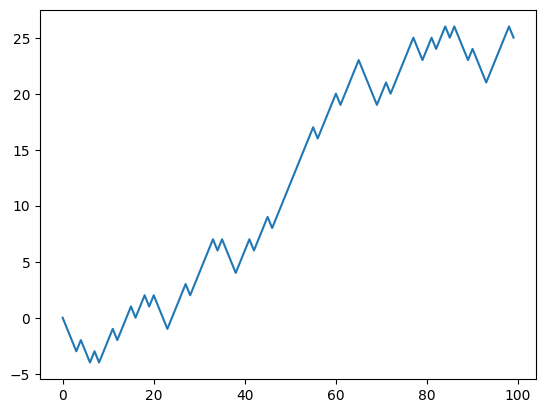

In [ ]:
plt.plot(caminata[:100])

In [ ]:
npasos = 1000

In [ ]:
draws = np.random.randint(0, 2, size=npasos)

In [ ]:
pasos = np.where(draws > 0, 1, -1)

In [ ]:
caminata = pasos.cumsum()

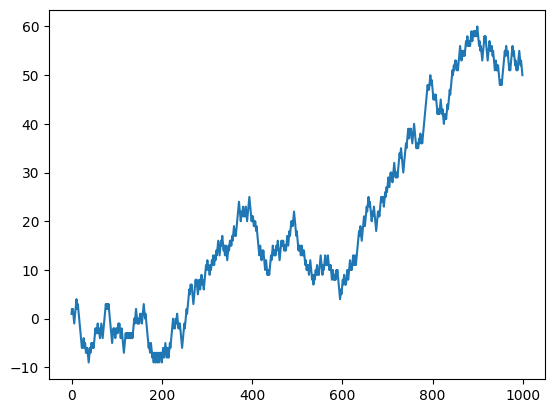

In [ ]:
plt.plot(caminata[:1000])

<p>&nbsp;</p>

De esto podemos comenzar a extraer estadísticas como el valor mínimo, -11, que se da en 112 y el valor máximo, 25, que se da en 286.

<p>&nbsp;</p>

In [ ]:
caminata.min()

-9

In [ ]:
caminata.max()

60

<p>&nbsp;</p>

Notemos que usar `argmax` aquí no siempre es eficiente porque siempre realiza un escaneo completo del arreglo. En este caso especial, una vez que se observa un `True` sabemos que es el valor máximo.

<p>&nbsp;</p>
<p>&nbsp;</p>


### Simulación de Muchas Caminatas Aleatorias a la vez

<p>&nbsp;</p>

Si el objetivo es simular muchas caminatas aleatorias, digamos 5,000, podemos generar todas las caminatas aleatorias con modificaciones menores al código anterior. Si pasamos una tupla de 2, las funciones `numpy.random` generarán un arreglo bidimensional de lanzamientos, y podemos calcular la suma acumulativa a través de las filas para calcular las 5,000 caminatas aleatorias en una sola toma:

<p>&nbsp;</p>

In [ ]:
ncaminatas = 5000

In [ ]:
npasos = 1000

In [ ]:
draws = np.random.randint(0, 2, size=(ncaminatas, npasos))

In [ ]:
pasos = np.where(draws > 0, 1, -1)

In [ ]:
caminatas = pasos.cumsum(1)

In [ ]:
caminatas

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

<p>&nbsp;</p>

Ahora, podemos calcular los valores máximos y mínimos obtenidos en todas las caminatas:

<p>&nbsp;</p>

In [ ]:
caminatas.max()

122

In [ ]:
caminatas.min()

-128

<p>&nbsp;</p>

De estas caminatas calculemos el tiempo mínimo de cruce a 30 ó -30. Esto es un poco complicado porque no todos los 5,000 alcanzan 30. Podemos verificar esto usando el método any:

<p>&nbsp;</p>

In [ ]:
hits30 = (np.abs(caminatas) >= 30).any(1)

In [ ]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [ ]:
hits30.sum()

3368

<p>&nbsp;</p>

Podemos usar este arreglo booleano para seleccionar las filas de `caminatas` que realmente cruzan el nivel absoluto de 30 y llamar a `argmax` a través del eje 1 para obtener la cantidad de cruces:

<p>&nbsp;</p>

In [ ]:
crossing_times = (np.abs(caminatas[hits30]) >= 30).argmax(1)

In [ ]:
crossing_times.mean()

509.99762470308787

<p>&nbsp;</p>

Para visualizar el ejemplo de las caminatas multiples veamos el siguiente ejemplo con 3 caminatas y 100 pasos:

<p>&nbsp;</p>

In [ ]:
ncaminatas = 3
npasos = 50
draws = np.random.randint(0, 2, size=(ncaminatas, npasos))
pasos = np.where(draws > 0, 1, -1)
caminatas = pasos.cumsum(1)

In [ ]:
draws

array([[0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 1]])

In [ ]:
pasos

array([[-1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
        -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
        -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        -1,  1],
       [ 1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
         1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
         1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
         1, -1],
       [ 1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
         1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,
         1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
         1,  1]])

In [ ]:
caminatas

array([[-1,  0,  1,  0, -1, -2, -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        -1,  0, -1,  0,  1,  2,  3,  2,  1,  0, -1,  0,  1,  0,  1,  0,
        -1, -2, -3, -2, -3, -2, -3, -4, -5, -6, -5, -6, -5, -4, -3, -2,
        -3, -2],
       [ 1,  0,  1,  0,  1,  2,  1,  2,  3,  4,  3,  2,  1,  2,  1,  2,
         3,  2,  3,  2,  3,  4,  5,  4,  5,  4,  5,  6,  7,  6,  7,  6,
         7,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  7,  8,
         9,  8],
       [ 1,  0, -1,  0,  1,  0,  1,  2,  1,  0,  1,  0, -1, -2, -3, -2,
        -1, -2, -1, -2, -1,  0, -1, -2, -1,  0, -1,  0, -1, -2, -1, -2,
        -1,  0, -1, -2, -1, -2, -1, -2, -1, -2, -3, -2, -3, -4, -3, -2,
        -1,  0]])

In [ ]:
caminatas.max()

9

In [ ]:
caminatas.min()

-6

In [ ]:
a, b, c = caminatas

<p>&nbsp;</p>

El siguiente codigo sirve para mostrar la figura correspondiente al ejemplo anterios de las 3 caminatas de 50 pasos cada una. El máximo de 5 y el mínimo de -12 se dan en la caminata c &nbsp; –––color verde––– &nbsp;  tal como se muestra en la figura 4-6.

<p>&nbsp;</p>

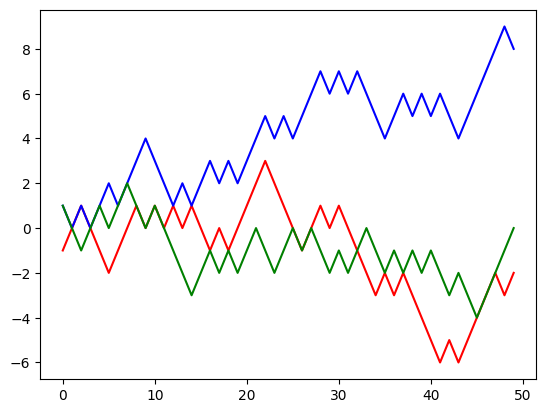

In [ ]:
plt.figure(1)
plt.plot(a[:50], "r-")
plt.plot(b[:50], "b-")
plt.plot(c[:50], "g-")
plt.show()
